## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    X = keras.layers.Dense(units=512, activation='relu')(input_layer)
    X = keras.layers.Dropout(0.2)(X)
    X = keras.layers.Dense(units=256, activation='relu')(X)
    X = keras.layers.Dropout(0.2)(X)
    X = keras.layers.Dense(units=128, activation='relu')(X)
    X = keras.layers.Dropout(0.2)(X)
    X = keras.layers.Dense(units=64, activation='relu')(X)
    output = keras.layers.Dense(units=10, activation='softmax')(X)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[output])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [6]:
"""
Compile your model
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)


In [7]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 141us/step - loss: 2.0601 - acc: 0.2301 - val_loss: 1.8268 - val_acc: 0.3404
Epoch 2/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.8569 - acc: 0.3297 - val_loss: 1.7303 - val_acc: 0.3859
Epoch 3/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.7884 - acc: 0.3542 - val_loss: 1.6978 - val_acc: 0.3906
Epoch 4/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.7452 - acc: 0.3714 - val_loss: 1.6508 - val_acc: 0.4148
Epoch 5/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.7078 - acc: 0.3864 - val_loss: 1.6242 - val_acc: 0.4186
Epoch 6/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.6830 - acc: 0.3965 - val_loss: 1.5815 - val_acc: 0.4374
Epoch 7/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6531 - acc: 0.4086 - val_loss: 1.

50000/50000 [==============================] - 7s 132us/step - loss: 1.3551 - acc: 0.5124 - val_loss: 1.3848 - val_acc: 0.5065
Epoch 60/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.3496 - acc: 0.5129 - val_loss: 1.4001 - val_acc: 0.5065
Epoch 61/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.3508 - acc: 0.5140 - val_loss: 1.3755 - val_acc: 0.5099
Epoch 62/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.3455 - acc: 0.5172 - val_loss: 1.3668 - val_acc: 0.5147
Epoch 63/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.3418 - acc: 0.5193 - val_loss: 1.3751 - val_acc: 0.5124
Epoch 64/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.3399 - acc: 0.5172 - val_loss: 1.3589 - val_acc: 0.5175
Epoch 65/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.3399 - acc: 0.5186 - val_loss: 1.3833 - val_acc: 0.5093
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 132us/step - loss: 1.2523 - acc: 0.5501 - val_loss: 1.3721 - val_acc: 0.5197
Epoch 118/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.2516 - acc: 0.5515 - val_loss: 1.3640 - val_acc: 0.5192
Epoch 119/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.2528 - acc: 0.5485 - val_loss: 1.3697 - val_acc: 0.5174
Epoch 120/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.2458 - acc: 0.5521 - val_loss: 1.3634 - val_acc: 0.5212
Epoch 121/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.2531 - acc: 0.5508 - val_loss: 1.3599 - val_acc: 0.5191
Epoch 122/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.2512 - acc: 0.5498 - val_loss: 1.3594 - val_acc: 0.5201
Epoch 123/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.2468 - acc: 0.5533 - val_loss: 1.3518 - val_acc: 0.5250
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 7s 132us/step - loss: 1.2010 - acc: 0.5690 - val_loss: 1.3613 - val_acc: 0.5283
Epoch 176/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1942 - acc: 0.5697 - val_loss: 1.3656 - val_acc: 0.5179
Epoch 177/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1898 - acc: 0.5745 - val_loss: 1.3776 - val_acc: 0.5168
Epoch 178/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1892 - acc: 0.5741 - val_loss: 1.3727 - val_acc: 0.5253
Epoch 179/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.1980 - acc: 0.5681 - val_loss: 1.3864 - val_acc: 0.5104
Epoch 180/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1986 - acc: 0.5677 - val_loss: 1.3687 - val_acc: 0.5231
Epoch 181/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1870 - acc: 0.5767 - val_loss: 1.3746 - val_acc: 0.5238
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 7s 132us/step - loss: 1.1641 - acc: 0.5821 - val_loss: 1.3809 - val_acc: 0.5218
Epoch 234/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1580 - acc: 0.5834 - val_loss: 1.3838 - val_acc: 0.5164
Epoch 235/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.1555 - acc: 0.5889 - val_loss: 1.3689 - val_acc: 0.5222
Epoch 236/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1616 - acc: 0.5829 - val_loss: 1.3881 - val_acc: 0.5111
Epoch 237/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1504 - acc: 0.5876 - val_loss: 1.3861 - val_acc: 0.5160
Epoch 238/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1567 - acc: 0.5853 - val_loss: 1.3750 - val_acc: 0.5199
Epoch 239/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1551 - acc: 0.5874 - val_loss: 1.3806 - val_acc: 0.5228
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 6s 130us/step - loss: 1.1276 - acc: 0.5975 - val_loss: 1.3848 - val_acc: 0.5222
Epoch 292/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1230 - acc: 0.5973 - val_loss: 1.3937 - val_acc: 0.5132
Epoch 293/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1346 - acc: 0.5950 - val_loss: 1.3764 - val_acc: 0.5190
Epoch 294/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1231 - acc: 0.5972 - val_loss: 1.3819 - val_acc: 0.5234
Epoch 295/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.1290 - acc: 0.5943 - val_loss: 1.4057 - val_acc: 0.5142
Epoch 296/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1285 - acc: 0.5942 - val_loss: 1.3871 - val_acc: 0.5134
Epoch 297/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1264 - acc: 0.5972 - val_loss: 1.4046 - val_acc: 0.5087
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 7s 130us/step - loss: 1.0952 - acc: 0.6091 - val_loss: 1.3957 - val_acc: 0.5170
Epoch 350/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1028 - acc: 0.6074 - val_loss: 1.3949 - val_acc: 0.5156
Epoch 351/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.1002 - acc: 0.6072 - val_loss: 1.4149 - val_acc: 0.5105
Epoch 352/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1017 - acc: 0.6044 - val_loss: 1.4163 - val_acc: 0.5083
Epoch 353/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.1001 - acc: 0.6082 - val_loss: 1.4427 - val_acc: 0.5076
Epoch 354/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0999 - acc: 0.6083 - val_loss: 1.4148 - val_acc: 0.5113
Epoch 355/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1011 - acc: 0.6060 - val_loss: 1.4147 - val_acc: 0.5065
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 7s 131us/step - loss: 1.0865 - acc: 0.6122 - val_loss: 1.4231 - val_acc: 0.5140
Epoch 408/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0719 - acc: 0.6146 - val_loss: 1.4424 - val_acc: 0.5020
Epoch 409/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0671 - acc: 0.6184 - val_loss: 1.4229 - val_acc: 0.5083
Epoch 410/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0838 - acc: 0.6142 - val_loss: 1.4160 - val_acc: 0.5075
Epoch 411/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0728 - acc: 0.6179 - val_loss: 1.4161 - val_acc: 0.5058
Epoch 412/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.0800 - acc: 0.6145 - val_loss: 1.4326 - val_acc: 0.5130
Epoch 413/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0716 - acc: 0.6168 - val_loss: 1.4242 - val_acc: 0.5113
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 7s 131us/step - loss: 1.0507 - acc: 0.6258 - val_loss: 1.4507 - val_acc: 0.5065
Epoch 466/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.0568 - acc: 0.6263 - val_loss: 1.4229 - val_acc: 0.5138
Epoch 467/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0660 - acc: 0.6208 - val_loss: 1.4558 - val_acc: 0.5038
Epoch 468/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.0719 - acc: 0.6179 - val_loss: 1.4144 - val_acc: 0.5142
Epoch 469/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0566 - acc: 0.6220 - val_loss: 1.4218 - val_acc: 0.5063
Epoch 470/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.0548 - acc: 0.6249 - val_loss: 1.4433 - val_acc: 0.5054
Epoch 471/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.0659 - acc: 0.6191 - val_loss: 1.4413 - val_acc: 0.5088
Epoch 472/500
50000/50000 [

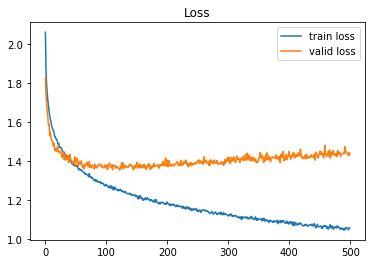

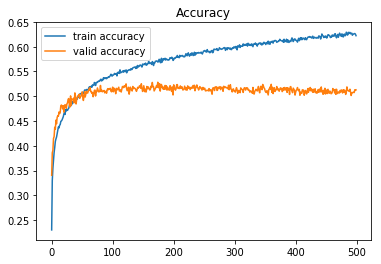

In [8]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""
%matplotlib inline
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()